# <center>Task 2</center>
<div style="font-size: 17px">Participants: Kononov Sergey,  Donskoy Ivan, Adikalic Chingiz <br>311 group</div>


In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.seasonal as seas
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Read data, stationary testing
### Read data

In [2]:
#Create DataFrame
ts = pd.read_csv('training.csv', parse_dates = ['Date'], index_col = 'Date')

#Print first 10 elements
ts.iloc[:10]

,Value
Date,
1959-01-01,22.8331
1959-02-01,23.2802
1959-03-01,23.6156
1959-04-01,24.1186
1959-05-01,24.4820
1959-06-01,24.5099
1959-07-01,23.9230
1959-08-01,23.1125
1959-09-01,23.0846


### Make plot

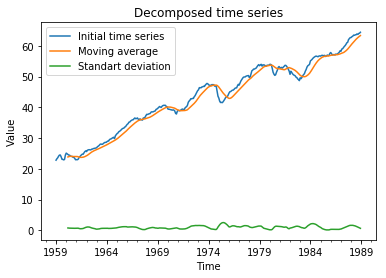

In [3]:
#plt.plot(time, ts.Value, 'b')
axes = ts.plot(title = 'Decomposed time series')

#Average calculation
mean = ts.rolling(window=15).mean()

#standart deviation calculation
std = ts.rolling(window=15).std()

#Moving average plot
mean.plot(ax = axes)

#Standart deviation plot
std.plot(ax = axes)

#Graph options
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Initial time series', 'Moving average', 'Standart deviation'])

plt.show()

### Dickey - Fuller test

In [4]:
def DF(data):   
    test = st.adfuller(data.Value)
    
    print('Dick-Fuller test result:')
    
    if test[0] > test[4]['5%']: 
        print ('One roots exist, time series isn\'t stationary.')
        return False
    else:
        print ('One roots doesn\'t exist, time series is stationary.')
        return True
    
DF(ts)

Dick-Fuller test result:
One roots exist, time series isn't stationary.


False

# Decomposition to tred, seasonality and noise

In [5]:
#Graph creat function
def chart(title, data):
    data.plot(legend = False)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    plt.show()

    #fill empty cells
    data.dropna(inplace = True)
    DF(data)

### Decomposition function

In [6]:
def decompose(dtype):
    #decompose to data array
    ts_model = seas.seasonal_decompose(ts, model = dtype)

    #initial plot description
    axes = ts_model.trend.plot(color = 'green')
    ts_model.seasonal.plot(ax = axes, color = 'red')
    ts_model.resid.plot(ax = axes, color = 'blue')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(['Trend', 'Seasonal', 'Resid'])
    plt.show()
    
    #following plot creation
    chart('Trend component', ts_model.trend)
    chart('Seasonal component', ts_model.seasonal)
    chart('Resid component', ts_model.resid)

### Additive model

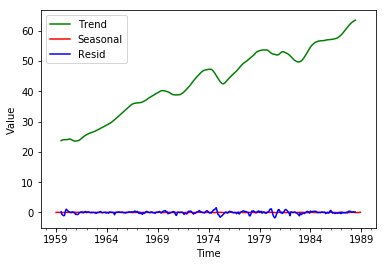

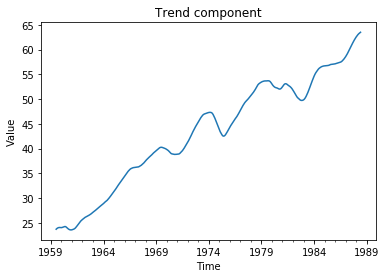

Dick-Fuller test result:
One roots exist, time series isn't stationary.


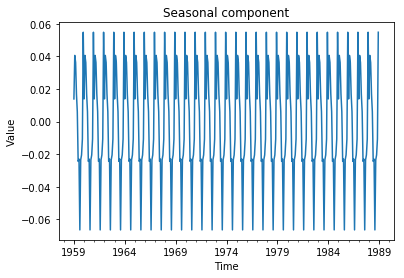

Dick-Fuller test result:
One roots doesn't exist, time series is stationary.


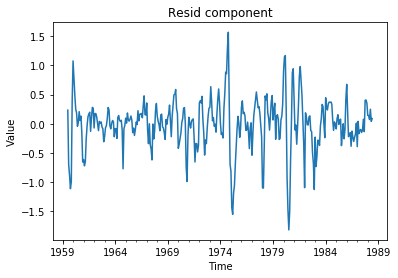

Dick-Fuller test result:
One roots doesn't exist, time series is stationary.


In [7]:
decompose('additive')

### Multiplicative model

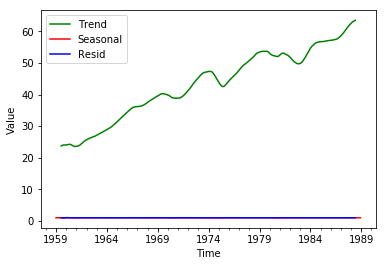

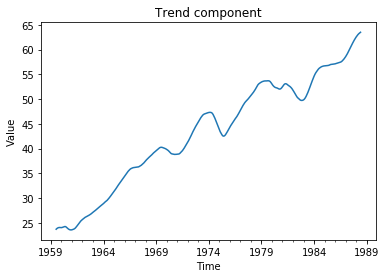

Dick-Fuller test result:
One roots exist, time series isn't stationary.


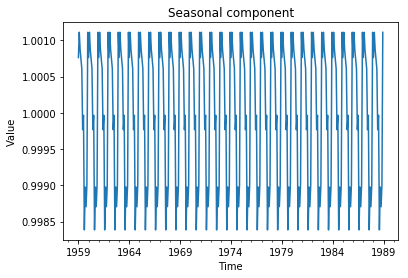

Dick-Fuller test result:
One roots doesn't exist, time series is stationary.


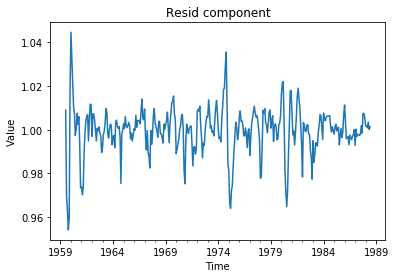

Dick-Fuller test result:
One roots doesn't exist, time series is stationary.


In [8]:
decompose('multiplicative')

# Create model and make forecast

### Integration order

In [9]:
order = 0
Lim = 10
tmp = ts

print('Test for 0 differentiation:')

while (not DF(tmp)) and (order < Lim):
    tmp = tmp.diff().dropna()
    order += 1
    print('\nTest for %d differentiation' % order)

print('\nIintegration order: %d' % order)

Test for 0 differentiation:
Dick-Fuller test result:
One roots exist, time series isn't stationary.

Test for 1 differentiation
Dick-Fuller test result:
One roots doesn't exist, time series is stationary.

Iintegration order: 1


### Autocorrelation & Partial-autocorrelation functions

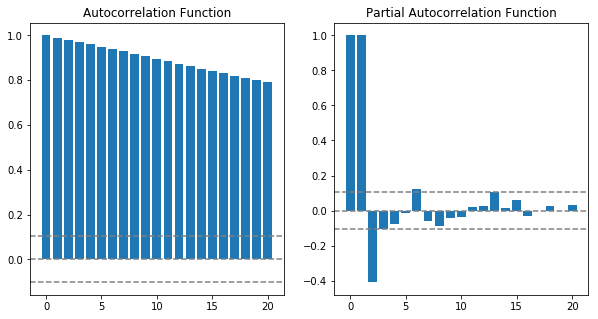

In [10]:
#ACF and PACF plots

#utocorrelation function in order to find q
lag_acf = acf(ts, nlags=20)

#Partial-autocorrelation function in order to find p
lag_pacf = pacf(ts, nlags=20, method='ols')

#set image size
plt.figure(figsize=(10,5))

#Plot ACF: 
plt.subplot(121) 
plt.bar(range(21),lag_acf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')

plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.bar(range(21),lag_pacf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation Function')

plt.show()

q = 1,2,3 - number of coeficients strongly different from zero (ACF graph)<br>
p = 2 - max number of coeficient strongly different from zero (PACF graph)

# ARIMA model

In [11]:
#set options
p = 1
q = 1
d = 1

#make model
model = ARIMA(ts, order = (p, d ,q))

#train model
model = model.fit()

### Forecast

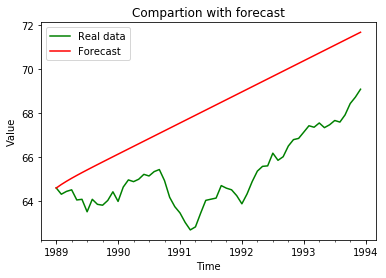

In [12]:
#Make forecast model
forecast = model.predict(start='1989-01-01', 
                            end='1993-12-01', typ='levels', dynamic=True)

#Make plot
test_ts = pd.read_csv('testing.csv', parse_dates = ['Date'], index_col = 'Date')

axes = test_ts.plot(color = 'green')
forecast.plot(ax = axes, color = 'red')

plt.legend(['Real data', 'Forecast'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Compartion with forecast')

plt.show()

# R2 score

In [13]:
#r2 score
r2 = r2_score(test_ts, forecast)

#the closer it to 1.0 the better
print('R2 score: %d' % r2)

#Akaike information criterion
#the less it is the better
print("Akaike: %d" % model.aic)

R2 score: -3
Akaike: 248


### Model 1
p = 1, q = 1, d = 1<br>
R2 score: -3<br>
AIC: 248<br>

### Model 2
p = 3, q = 2, d = 1<br>
R2 score: -3<br>
AIC: 249<br>

### Model 3
p = 2, q = 2, d = 1<br>
R2 score: -3<br>
AIC: 248<br>